In [1]:
# imports

%matplotlib inline
import platform
print(platform.python_version())
from ROOT import TFile,vector
import ROOT
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from numpy import asarray
from root_pandas import read_root
import math
import json
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from textwrap import wrap
import copy

3.5.2
Welcome to JupyROOT 6.14/08


# This notebook makes gamma plots for the showerreco paper
inputs: pi0 pickles that have been modified to contain truth info
outputs: pickles of plots

In [2]:
# first load in pi0 pickles
tag = 'Jan_15_run1_CCPi0'
df_ccpi0_r1_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run3_CCPi0'
df_ccpi0_r3_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run1_NCPi0'
df_ncpi0_r1_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run3a_NCPi0'
df_ncpi0_r3a_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run3b_NCPi0'
df_ncpi0_r3b_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)

# combine r3a,r3b files
df_ncpi0_r3_goodruns_pmtprecut = df_ncpi0_r3a_goodruns_pmtprecut.append(df_ncpi0_r3b_goodruns_pmtprecut)

In [3]:
# apply selection 
cuts_new = 'PassPMTPrecut ==1 and PassShowerReco ==1 and InFiducial ==1 and _pi0mass_new<400 and DeltaMass_new >0 and DeltaMass_new <1400 and NTracks ==2 and Proton_Edep>60.0  and Electron_Edep>35.0  and shower1_E_Y_new>80 and ChargeNearTrunk >250 and Electron_ThetaRecoB_e1ep <1.5 and _shower_alpha <2.5 and _pi0mass_new>0 and BDTscore_1e1p<.7'
RSE = ['run','subrun','event']
sort = 'shower1_E_Y'
df_ccpi0_r1_pi0 = df_ccpi0_r1_goodruns_pmtprecut.query(cuts_new)
df_ccpi0_r1_pi0 = df_ccpi0_r1_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ccpi0_r3_pi0 = df_ccpi0_r3_goodruns_pmtprecut.query(cuts_new)
df_ccpi0_r3_pi0 = df_ccpi0_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ncpi0_r1_pi0 = df_ncpi0_r1_goodruns_pmtprecut.query(cuts_new)
df_ncpi0_r1_pi0 = df_ncpi0_r1_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ncpi0_r3_pi0 = df_ncpi0_r3_goodruns_pmtprecut.query(cuts_new)
df_ncpi0_r3_pi0 = df_ncpi0_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
print("pi0 lengths: ", len(df_ccpi0_r1_pi0), len(df_ccpi0_r3_pi0), len(df_ncpi0_r1_pi0), len(df_ncpi0_r3_pi0))

pi0 lengths:  1121 1011 1134 1174


In [4]:
# get variable lists I need for plots Ereco,Etrue,Enclosed Q from each df (1=lead,2=sublead)

# EReco1_CC1=df_ccpi0_r1_pi0['gamma_lead_recoE'].values
# EReco2_CC1=df_ccpi0_r1_pi0['gamma_sub_recoE'].values
# ETrue1_CC1=df_ccpi0_r1_pi0['gamma_lead_trueE'].values
# ETrue2_CC1=df_ccpi0_r1_pi0['gamma_sub_trueE'].values
# QReco1_CC1=df_ccpi0_r1_pi0['gamma_lead_recoQ'].values
# QReco2_CC1=df_ccpi0_r1_pi0['gamma_sub_recoQ'].values

# EReco1_CC3=df_ccpi0_r3_pi0['gamma_lead_recoE'].values
# EReco2_CC3=df_ccpi0_r3_pi0['gamma_sub_recoE'].values
# ETrue1_CC3=df_ccpi0_r3_pi0['gamma_lead_trueE'].values
# ETrue2_CC3=df_ccpi0_r3_pi0['gamma_sub_trueE'].values
# QReco1_CC3=df_ccpi0_r3_pi0['gamma_lead_recoQ'].values
# QReco2_CC3=df_ccpi0_r3_pi0['gamma_sub_recoQ'].values

# EReco1_NC1=df_ncpi0_r1_pi0['gamma_lead_recoE'].values
# EReco2_NC1=df_ncpi0_r1_pi0['gamma_sub_recoE'].values
# ETrue1_NC1=df_ncpi0_r1_pi0['gamma_lead_trueE'].values
# ETrue2_NC1=df_ncpi0_r1_pi0['gamma_sub_trueE'].values
# QReco1_NC1=df_ncpi0_r1_pi0['gamma_lead_recoQ'].values
# QReco2_NC1=df_ncpi0_r1_pi0['gamma_sub_recoQ'].values

# EReco1_NC3=df_ncpi0_r3_pi0['gamma_lead_recoE'].values
# EReco2_NC3=df_ncpi0_r3_pi0['gamma_sub_recoE'].values
# ETrue1_NC3=df_ncpi0_r3_pi0['gamma_lead_trueE'].values
# ETrue2_NC3=df_ncpi0_r3_pi0['gamma_sub_trueE'].values
# QReco1_NC3=df_ncpi0_r3_pi0['gamma_lead_recoQ'].values
# QReco2_NC3=df_ncpi0_r3_pi0['gamma_sub_recoQ'].values


EReco1_CC1=df_ccpi0_r1_pi0['shower1_E_Y'].values
EReco2_CC1=df_ccpi0_r1_pi0['shower2_E_Y'].values
ETrue1_CC1=df_ccpi0_r1_pi0['shower_energy_true'].values
ETrue2_CC1=df_ccpi0_r1_pi0['secondshower_energy_true'].values

EReco1_CC3=df_ccpi0_r3_pi0['shower1_E_Y'].values
EReco2_CC3=df_ccpi0_r3_pi0['shower2_E_Y'].values
ETrue1_CC3=df_ccpi0_r3_pi0['shower_energy_true'].values
ETrue2_CC3=df_ccpi0_r3_pi0['secondshower_energy_true'].values


EReco1_NC1=df_ncpi0_r1_pi0['shower1_E_Y'].values
EReco2_NC1=df_ncpi0_r1_pi0['shower2_E_Y'].values
ETrue1_NC1=df_ncpi0_r1_pi0['shower_energy_true'].values
ETrue2_NC1=df_ncpi0_r1_pi0['secondshower_energy_true'].values

EReco1_NC3=df_ncpi0_r3_pi0['shower1_E_Y'].values
EReco2_NC3=df_ncpi0_r3_pi0['shower2_E_Y'].values
ETrue1_NC3=df_ncpi0_r3_pi0['shower_energy_true'].values
ETrue2_NC3=df_ncpi0_r3_pi0['secondshower_energy_true'].values

In [5]:
# dfs= [df_ccpi0_r1_pi0,df_ccpi0_r3_pi0,df_ncpi0_r1_pi0,df_ncpi0_r3_pi0]
# angles=[]

# for df_pi0 in dfs:
#     lead_recox = df_pi0['gamma_lead_recoX'].values
#     lead_recoy = df_pi0['gamma_lead_recoY'].values
#     lead_recoz = df_pi0['gamma_lead_recoZ'].values
#     sub_recox = df_pi0['gamma_sub_recoX'].values
#     sub_recoy = df_pi0['gamma_sub_recoY'].values
#     sub_recoz = df_pi0['gamma_sub_recoZ'].values
#     lead_truex = df_pi0['gamma_lead_trueX'].values
#     lead_truey = df_pi0['gamma_lead_trueY'].values
#     lead_truez = df_pi0['gamma_lead_trueZ'].values
#     sub_truex = df_pi0['gamma_sub_trueX'].values
#     sub_truey = df_pi0['gamma_sub_trueY'].values
#     sub_truez = df_pi0['gamma_sub_trueZ'].values
    
#     coslead_v =[]
#     cossub_v = []
#     for i in range(5):
#         print(i)
#         magleadreco= sqrt(lead_recox[i]**2+lead_recoy[i]**2+lead_recoz[i]**2)
#         magsubreco= sqrt(sub_recox[i]**2+sub_recoy[i]**2+sub_recoz[i]**2)
#         magleadtrue= sqrt(lead_truex[i]**2+lead_truey[i]**2+lead_truez[i]**2)
#         magsubtrue= sqrt(sub_truex[i]**2+lead_truey[i]**2+lead_truez[i]**2)

#         coslead_v.append((lead_recox[i]*lead_truex[i]+lead_recoy[i]*lead_truey[i]+lead_recoz[i]*lead_truez[i])/(magleadreco*magleadtrue))
#         cossub_v.append((sub_recox[i]*sub_truex[i]+sub_recoy[i]*sub_truey[i]+sub_recoz[i]*sub_truez[i])/(magsubreco*magsubtrue))
#         print((lead_recox[i]*lead_truex[i]+lead_recoy[i]*lead_truey[i]+lead_recoz[i]*lead_truez[i])/(magleadreco*magleadtrue))
#     angles.append(coslead_v)
#     angles.append(cossub_v)
# print(angles)
    

In [6]:
# lets make an energy resolution variables for first and second showers - do NC/CC seperately
# (reco-true)/true

Eres_lead_cc = []
Eres_sub_cc = []
Eres_lead_nc = []
Eres_sub_nc = []
Angle_1_cc =[]
Angle_2_cc =[]
Angle_1_nc =[]
Angle_2_nc =[]

# for i in angles[0]:
#     if i >=0:
#         Angle_1_cc.append(i)
        
# for i in angles[2]:
#     if i >=0:
#         Angle_1_cc.append(i)

# for i in angles[4]:
#     if i >=0:
#         Angle_1_nc.append(i)
        
# for i in angles[6]:
#     if i >=0:
#         Angle_1_nc.append(i)
        
# for i in angles[1]:
#     if i >=0:
#         Angle_2_cc.append(i)
        
# for i in angles[3]:
#     if i >=0:
#         Angle_2_cc.append(i)

# for i in angles[5]:
#     if i >=0:
#         Angle_2_nc.append(i)
        
# for i in angles[7]:
#     if i >=0:
#         Angle_2_nc.append(i)
        

for i in range(len(EReco1_CC1)):
    if(ETrue1_CC1[i]>0 and ETrue2_CC1[i]>0):
        Eres_lead_cc.append((EReco1_CC1[i]-ETrue1_CC1[i])/ETrue1_CC1[i])
        Eres_sub_cc.append((EReco2_CC1[i]-ETrue2_CC1[i])/ETrue2_CC1[i])
    
for i in range(len(EReco1_CC3)):
    if(ETrue1_CC3[i]>0 and ETrue2_CC3[i]>0):
        Eres_lead_cc.append((EReco1_CC3[i]-ETrue1_CC3[i])/ETrue1_CC3[i])
        Eres_sub_cc.append((EReco2_CC3[i]-ETrue2_CC3[i])/ETrue2_CC3[i])
    
for i in range(len(EReco1_NC1)):
    if(ETrue1_NC1[i]>0 and ETrue2_NC1[i]>0):
        Eres_lead_nc.append((EReco1_NC1[i]-ETrue1_NC1[i])/ETrue1_NC1[i])
        Eres_sub_nc.append((EReco2_NC1[i]-ETrue2_NC1[i])/ETrue2_NC1[i])
    
for i in range(len(EReco1_NC3)):
    if(ETrue1_NC3[i]>0 and ETrue2_NC3[i]>0):
        Eres_lead_nc.append((EReco1_NC3[i]-ETrue1_NC3[i])/ETrue1_NC3[i])
        Eres_sub_nc.append((EReco2_NC3[i]-ETrue2_NC3[i])/ETrue2_NC3[i])


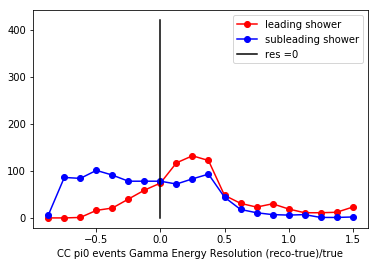

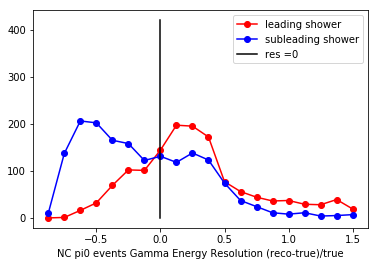

In [7]:
# Make plot and save as a pickle
# pickle.dump(  fig,  open('FigureObject.pickle',  'wb')  )

# make 3 plots, cc/nc samples + combined
# Eres_lead_comb = Eres_lead_cc.append(Eres_lead_nc)
# print(Eres_lead_cc)
# Eres_sub_comb = Eres_sub_cc.extend(Eres_sub_nc)
# # potweight the combined
# potweight_lead=[]
# potweight_sub=[]
# CCPI0_R1_POT = 6.95344e+20
# CCPI0_R3_POT = 5.92213e+20
# NCPI0_R1_POT = 2.90401e+21
# NCPI0_R3a_POT = 2.62745e+20
# NCPI0_R3b_POT = 2.22482e+21
# for i in range(len(Eres_lead_cc)):
#     potweight_lead.append(6.87e20/(CCPI0_R1_POT+CCPI0_R1_POT))
# for i in range(len(Eres_lead_nc)):
#     potweight_lead.append(6.87e20/(NCPI0_R1_POT+NCPI0_R3a_POT+NCPI0_R3b_POT))

# for i in range(len(Eres_sub_cc)):
#     potweight_sub.append(6.87e20/(CCPI0_R1_POT+CCPI0_R1_POT))
# for i in range(len(Eres_sub_nc)):
#     potweight_sub.append(6.87e20/(NCPI0_R1_POT+NCPI0_R3a_POT+NCPI0_R3b_POT))

# turn into histograms
nbins = 20
myrange=(-1,1.5)
# print(Eres_lead_cc)
Eres_lead_cc_Hist,binedges = np.histogram( Eres_lead_cc, bins = nbins, range = myrange)
Eres_sub_cc_Hist,binedges = np.histogram( Eres_sub_cc, bins = nbins, range = myrange)
Eres_lead_nc_Hist,binedges = np.histogram( Eres_lead_nc, bins = nbins, range = myrange)
Eres_sub_nc_Hist,binedges = np.histogram( Eres_sub_nc, bins = nbins, range = myrange)
# print(len(Eres_lead_comb),len(potweight_lead))
# Eres_lead_comb_Hist,binedges = np.histogram( Eres_lead_comb, bins = nbins, range = myrange,weights=potweight_lead)
# Eres_sub_comb_Hist,binedges = np.histogram( Eres_sub_comb, bins = nbins, range = myrange,weights=potweight_sub)

bincenters = np.ones(len(binedges)-1)
for i in range(len(binedges)-1):
    bincenters[i] = binedges[i]+((myrange[1]-myrange[0])/nbins)


# plot settings
plt.plot(bincenters,Eres_lead_cc_Hist,color = 'Red', marker = 'o',label = "leading shower")
plt.plot(bincenters,Eres_sub_cc_Hist,color = 'blue', marker = 'o',label = "subleading shower")
X = [0,0]
Y = [0,420]
plt.plot(X,Y,color='black',label="res =0")
plt.xlabel("CC pi0 events Gamma Energy Resolution (reco-true)/true")
plt.legend()
plt.show()
plt.close()

plt.plot(bincenters,Eres_lead_nc_Hist,color = 'Red', marker = 'o',label = "leading shower")
plt.plot(bincenters,Eres_sub_nc_Hist,color = 'blue', marker = 'o',label = "subleading shower")
plt.plot(X,Y,color='black',label="res =0")
plt.xlabel("NC pi0 events Gamma Energy Resolution (reco-true)/true")
plt.legend()
plt.show()
plt.close()

# plt.plot(bincenters,Eres_lead_comb_Hist,color = 'Red', marker = 'o',label = "leading shower")
# plt.plot(bincenters,Eres_sub_comb_Hist,color = 'blue', marker = 'o',label = "subleading shower")
# plt.plot(X,Y,color='black',label="res =0")
# plt.xlabel("Pi0 events Gamma Energy Resolution (reco-true)/true")
# plt.ylabel("POT normalized number of events")
# plt.legend()
# plt.show()
# plt.close()


# fig,ax = plt.subplots(figsize=(16,11))
# ax.hist(Eres_lead_cc,nbins,range=myrange,color='red',stacked=False,linewidth=0,label='leading shower',edgecolor='black')



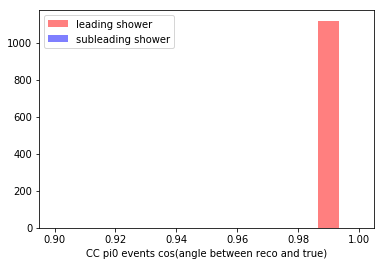

In [37]:
nbins = 15
myrange=(.9,1)
# print(Eres_lead_cc)
Angle1_cc_Hist,binedges = np.histogram( Angle_1_cc, bins = nbins, range = myrange)
Angle2_cc_Hist,binedges = np.histogram( Angle_2_cc, bins = nbins, range = myrange)
Angle1_nc_Hist,binedges = np.histogram( Angle_1_nc, bins = nbins, range = myrange)
Angle2_nc_Hist,binedges = np.histogram( Angle_2_nc, bins = nbins, range = myrange)

bincenters = np.ones(len(binedges)-1)
for i in range(len(binedges)-1):
    bincenters[i] = binedges[i]+((myrange[1]-myrange[0])/nbins)


# plot settings
plt.hist(Angle_1_cc,range=myrange,color = 'Red',label = "leading shower",bins=nbins,alpha=.5,stacked=False)
plt.hist(Angle_2_cc,range=myrange,color = 'BLue',label = "subleading shower",bins=nbins,alpha=.5,stacked=False)
plt.xlabel("CC pi0 events cos(angle between reco and true)")
plt.legend()
plt.show()
plt.close()

# plt.plot(bincenters,Angle1_nc_Hist,color = 'Red', marker = 'o',label = "leading shower")
# plt.plot(bincenters,Angle2_nc_Hist,color = 'blue', marker = 'o',label = "subleading shower")
# plt.xlabel("NC pi0 events cos(angle between reco and true)")
# plt.legend()
# plt.show()
# plt.close()

# plt.plot(bincenters,Eres_lead_comb_Hist,color = 'Red', marker = 'o',label = "leading shower")
# plt.plot(bincenters,Eres_sub_comb_Hist,color = 'blue', marker = 'o',label = "subleading shower")
# plt.plot(X,Y,color='black',label="res =0")
# plt.xlabel("Pi0 events Gamma Energy Resolution (reco-true)/true")
# plt.ylabel("POT normalized number of events")
# plt.legend()
# plt.show()
# plt.close()


# fig,ax = plt.subplots(figsize=(16,11))
# ax.hist(Eres_lead_cc,nbins,range=myrange,color='red',stacked=False,linewidth=0,label='leading shower',edgecolor='black')



In [ ]:
# etruearr_el = []

# erecoUarr = []
# erecoVarr = []
# erecoYarr = []
# erecompvUarr = []
# erecompvVarr = []
# erecompvYarr = []
# erecoselUarr = []
# erecoselVarr = []
# erecoselYarr = []

# fracerrorU = []
# fracerrorV = []
# fracerrorY = []
# fracerrormpvU = []
# fracerrormpvV = []
# fracerrormpvY = []
# fracerrorselU = []
# fracerrorselV = []
# fracerrorselY = []

# sumQUarr = []
# sumQVarr = []
# sumQYarr = []

# fracerror1 = []
# fracerror2 = []
# fracerror3 = []



# clusterConsistencyArr = []
# diffarr = []
# enuarr = []


# selectedOnly = False

# jsave = [0,1,2,3,4]


# for j,(data_str,sel_list) in enumerate(zip(["mcc9_v28_wctagger_nueintrinsics_meta_clusterCalib.txt",
#                                             "mcc9_v29e_dl_run2_bnb_intrinsics_nue_overlay_meta_clusterCalib.txt",
#                                             "mcc9_v29e_dl_run3b_bnb_intrinsic_nue_overlay_nocrtremerge_meta_clusterCalib.txt",
#                                             "mcc9_v29e_dl_run1_bnb_intrinsic_nue_LowE_meta_clusterCalib.txt",
#                                             "mcc9_v29e_dl_run3b_bnb_intrinsic_nue_LowE_meta_clusterCalib.txt"],
#                                             [sel_r1,sel_r2,sel_r3,sel_low_r1,sel_low_r3])):

#     if j not in jsave: continue
#     print(data_str)
#     data = np.loadtxt(data_str)
#     for i,entry in enumerate(data):
        
#         if(i%1000==0): print(float(i)/float(len(data)),end='\r')
        
#         run, subrun, event, vtx, etrue, \
#         erecoU, erecoV, erecoY, \
#         dist, inFid, \
#         sumQU, sumQV, sumQY, \
#         x, y, z = entry
        
#         if selectedOnly:
#             enu = binarySearch([run,subrun,event,vtx],sel_list)
#             if enu < 0: continue
        
#         erecoU, erecoV, erecoY = getEreco(sumQU,sumQV,sumQY)
#         erecoY = getErecoOldY(sumQY)
#         erecompvU, erecompvV, erecompvY = getErecoMPV(sumQU,sumQV,sumQY)
#         erecoselU, erecoselV, erecoselY = getErecoSelOnly(sumQU,sumQV,sumQY)
        
#         if etrue != -1 and erecoY != -1 and dist < 2 and inFid:
#             if selectedOnly: enuarr.append(enu)
#             fracerrorU.append((erecoU-etrue)/etrue)
#             fracerrorV.append((erecoV-etrue)/etrue)
#             fracerrorY.append((erecoY-etrue)/etrue)
#             fracerrormpvU.append((erecompvU-etrue)/etrue)
#             fracerrormpvV.append((erecompvV-etrue)/etrue)
#             fracerrormpvY.append((erecompvY-etrue)/etrue)
#             fracerrorselU.append((erecoselU-etrue)/etrue)
#             fracerrorselV.append((erecoselV-etrue)/etrue)
#             fracerrorselY.append((erecoselY-etrue)/etrue)
#             if j in [0,3]:
#                 fracerror1.append(fracerrorselY[-1])
#             elif j in [1]:
#                 fracerror2.append(fracerrorselY[-1])
#             if j in [2,4]:
#                 fracerror3.append(fracerrorselY[-1])
#             sumQUarr.append(sumQU)
#             sumQVarr.append(sumQV)
#             sumQYarr.append(sumQY)
#             erecoUarr.append(erecoU)
#             erecoVarr.append(erecoV)
#             erecoYarr.append(erecoY)
#             erecompvUarr.append(erecompvU)
#             erecompvVarr.append(erecompvV)
#             erecompvYarr.append(erecompvY)
#             erecoselUarr.append(erecoselU)
#             erecoselVarr.append(erecoselV)
#             erecoselYarr.append(erecoselY)
#             etruearr_el.append(etrue)